In [3]:
import os
os.chdir("../")

In [4]:
os.getcwd()

'/home/adam/Workspace/personal/unihack/fast-form'

In [49]:
json_config = """
{
    "width": 1885,
    "height": 2609,
    "fields": [
        {
            "name": "1",
            "type": "string",
            "topLeft": {
                "x": 300,
                "y": 2224
            },
            "numberOfBoxes": 4,
            "boxWidth": 78,
            "boxHeight": 65,
            "spaceBetweenBoxes": 0,
            "orientation": "vertical"
        }
    ]
}
"""

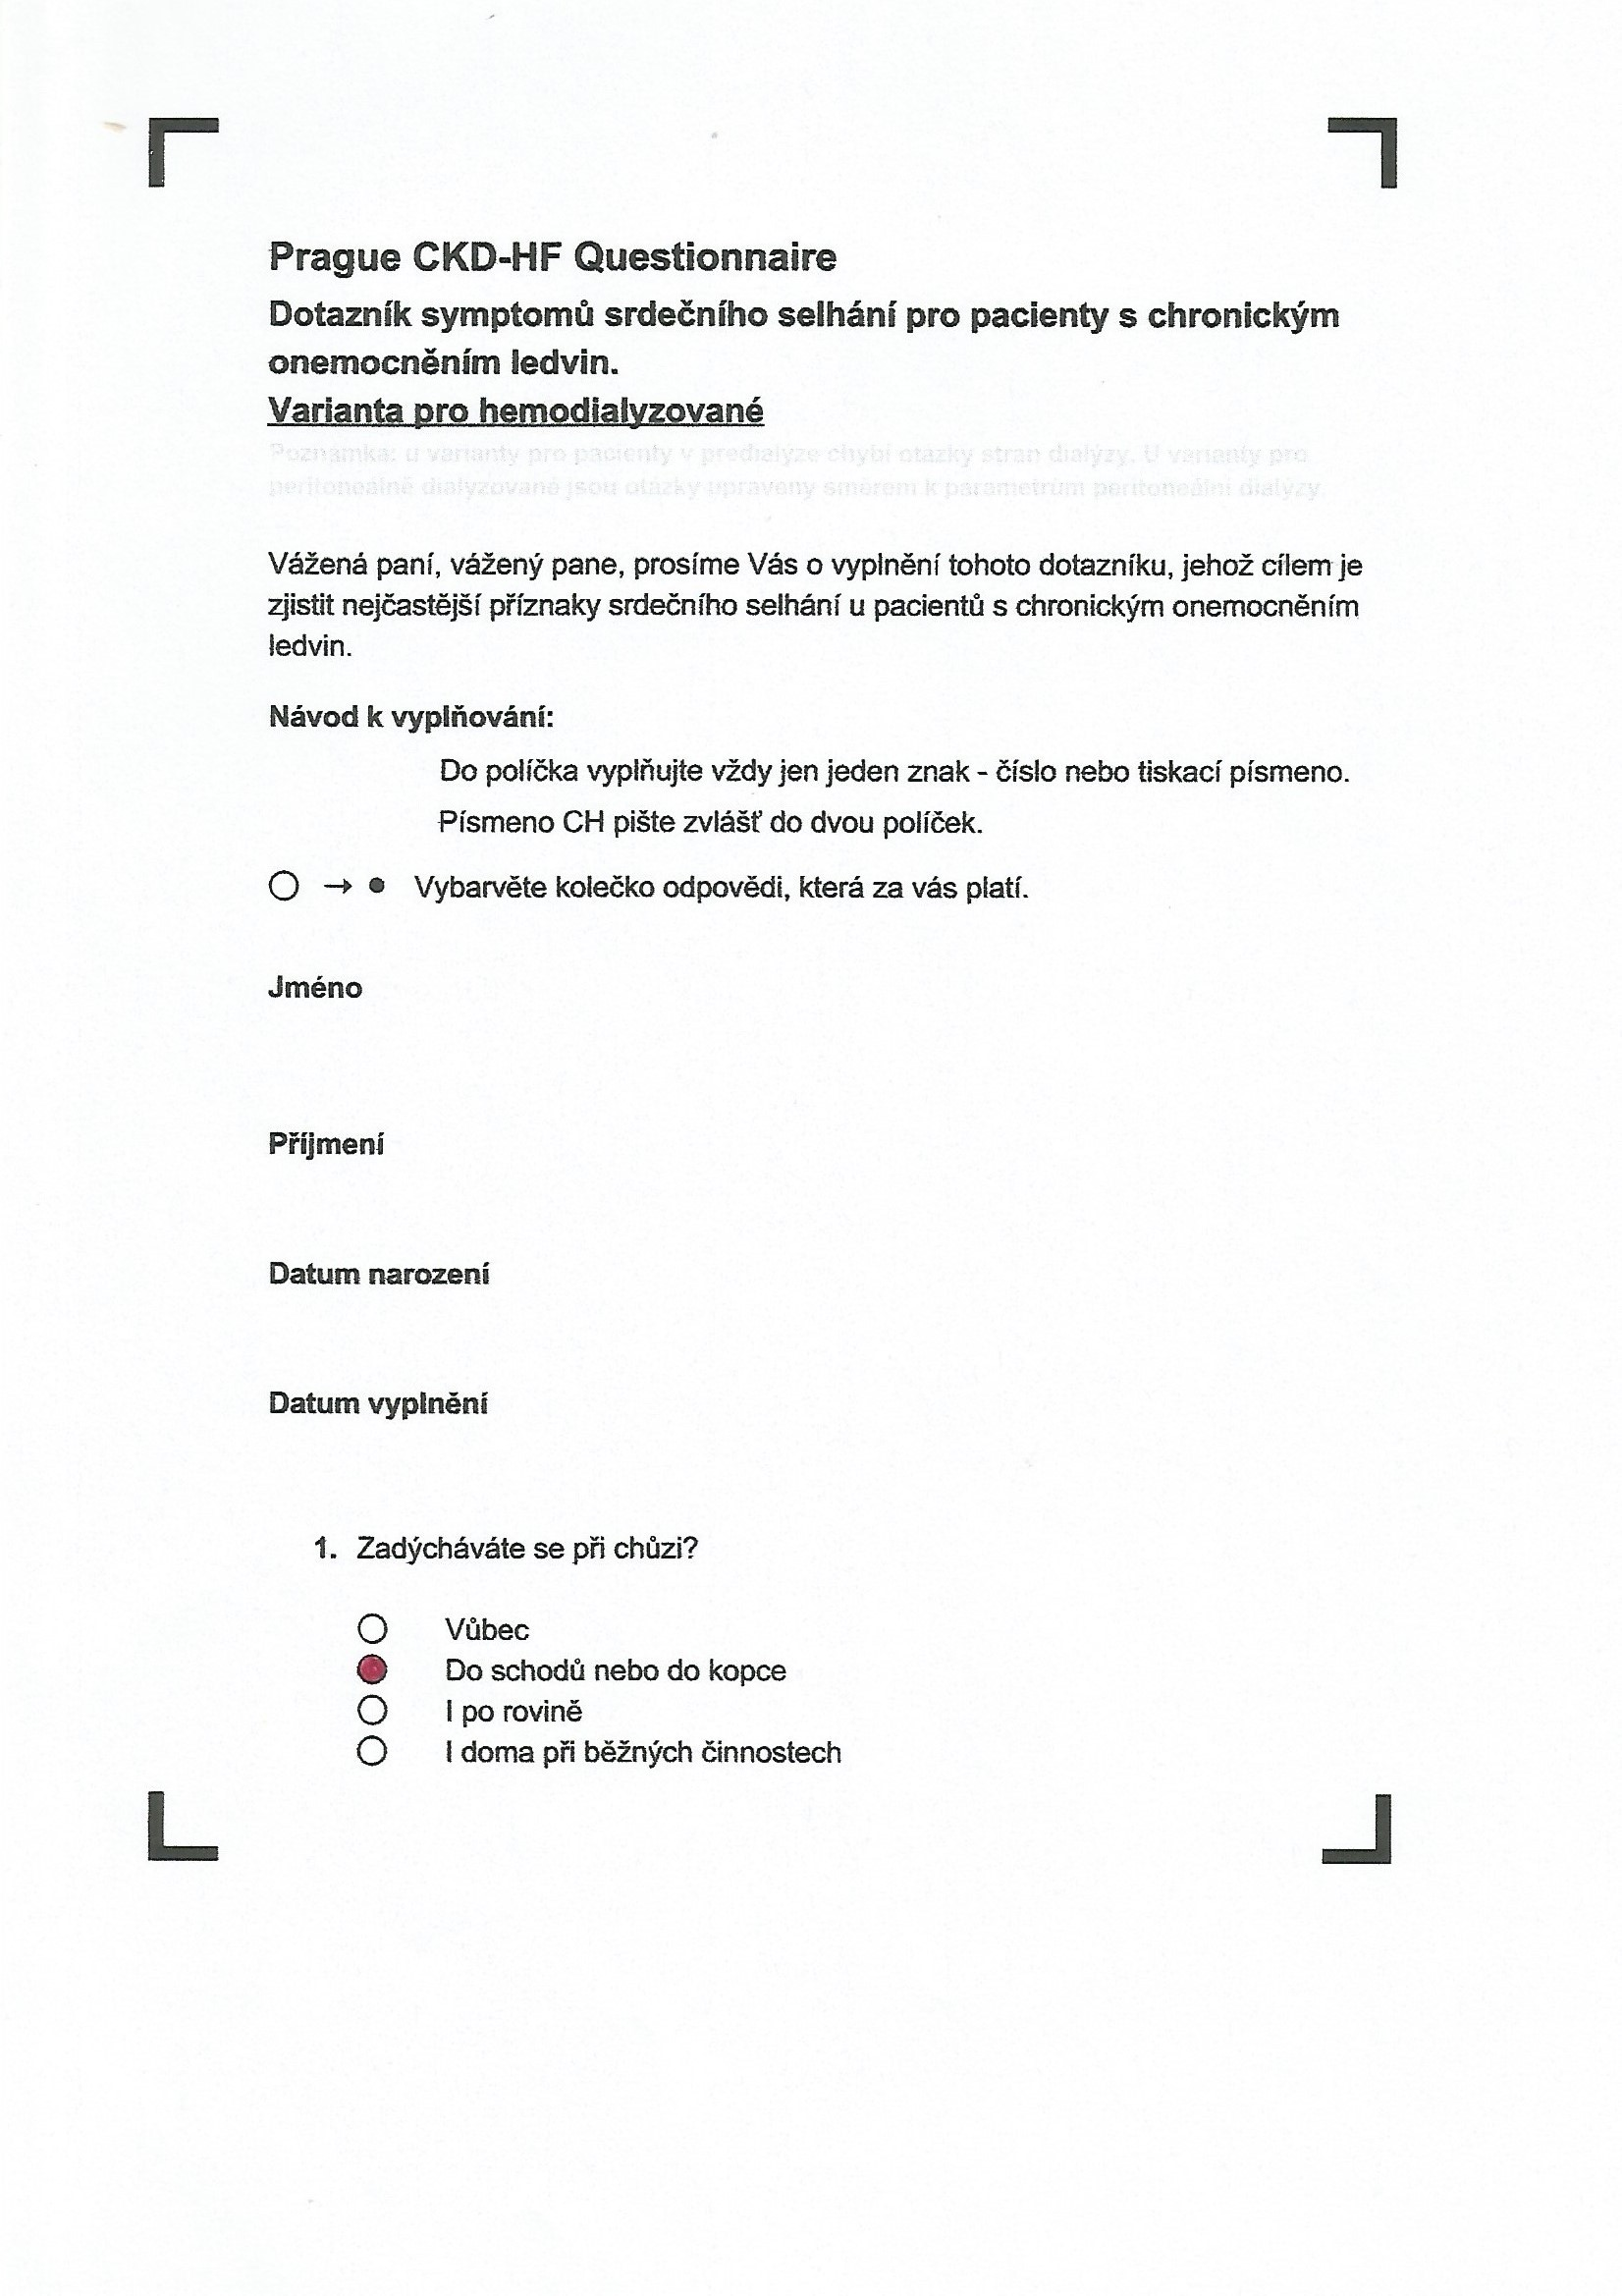

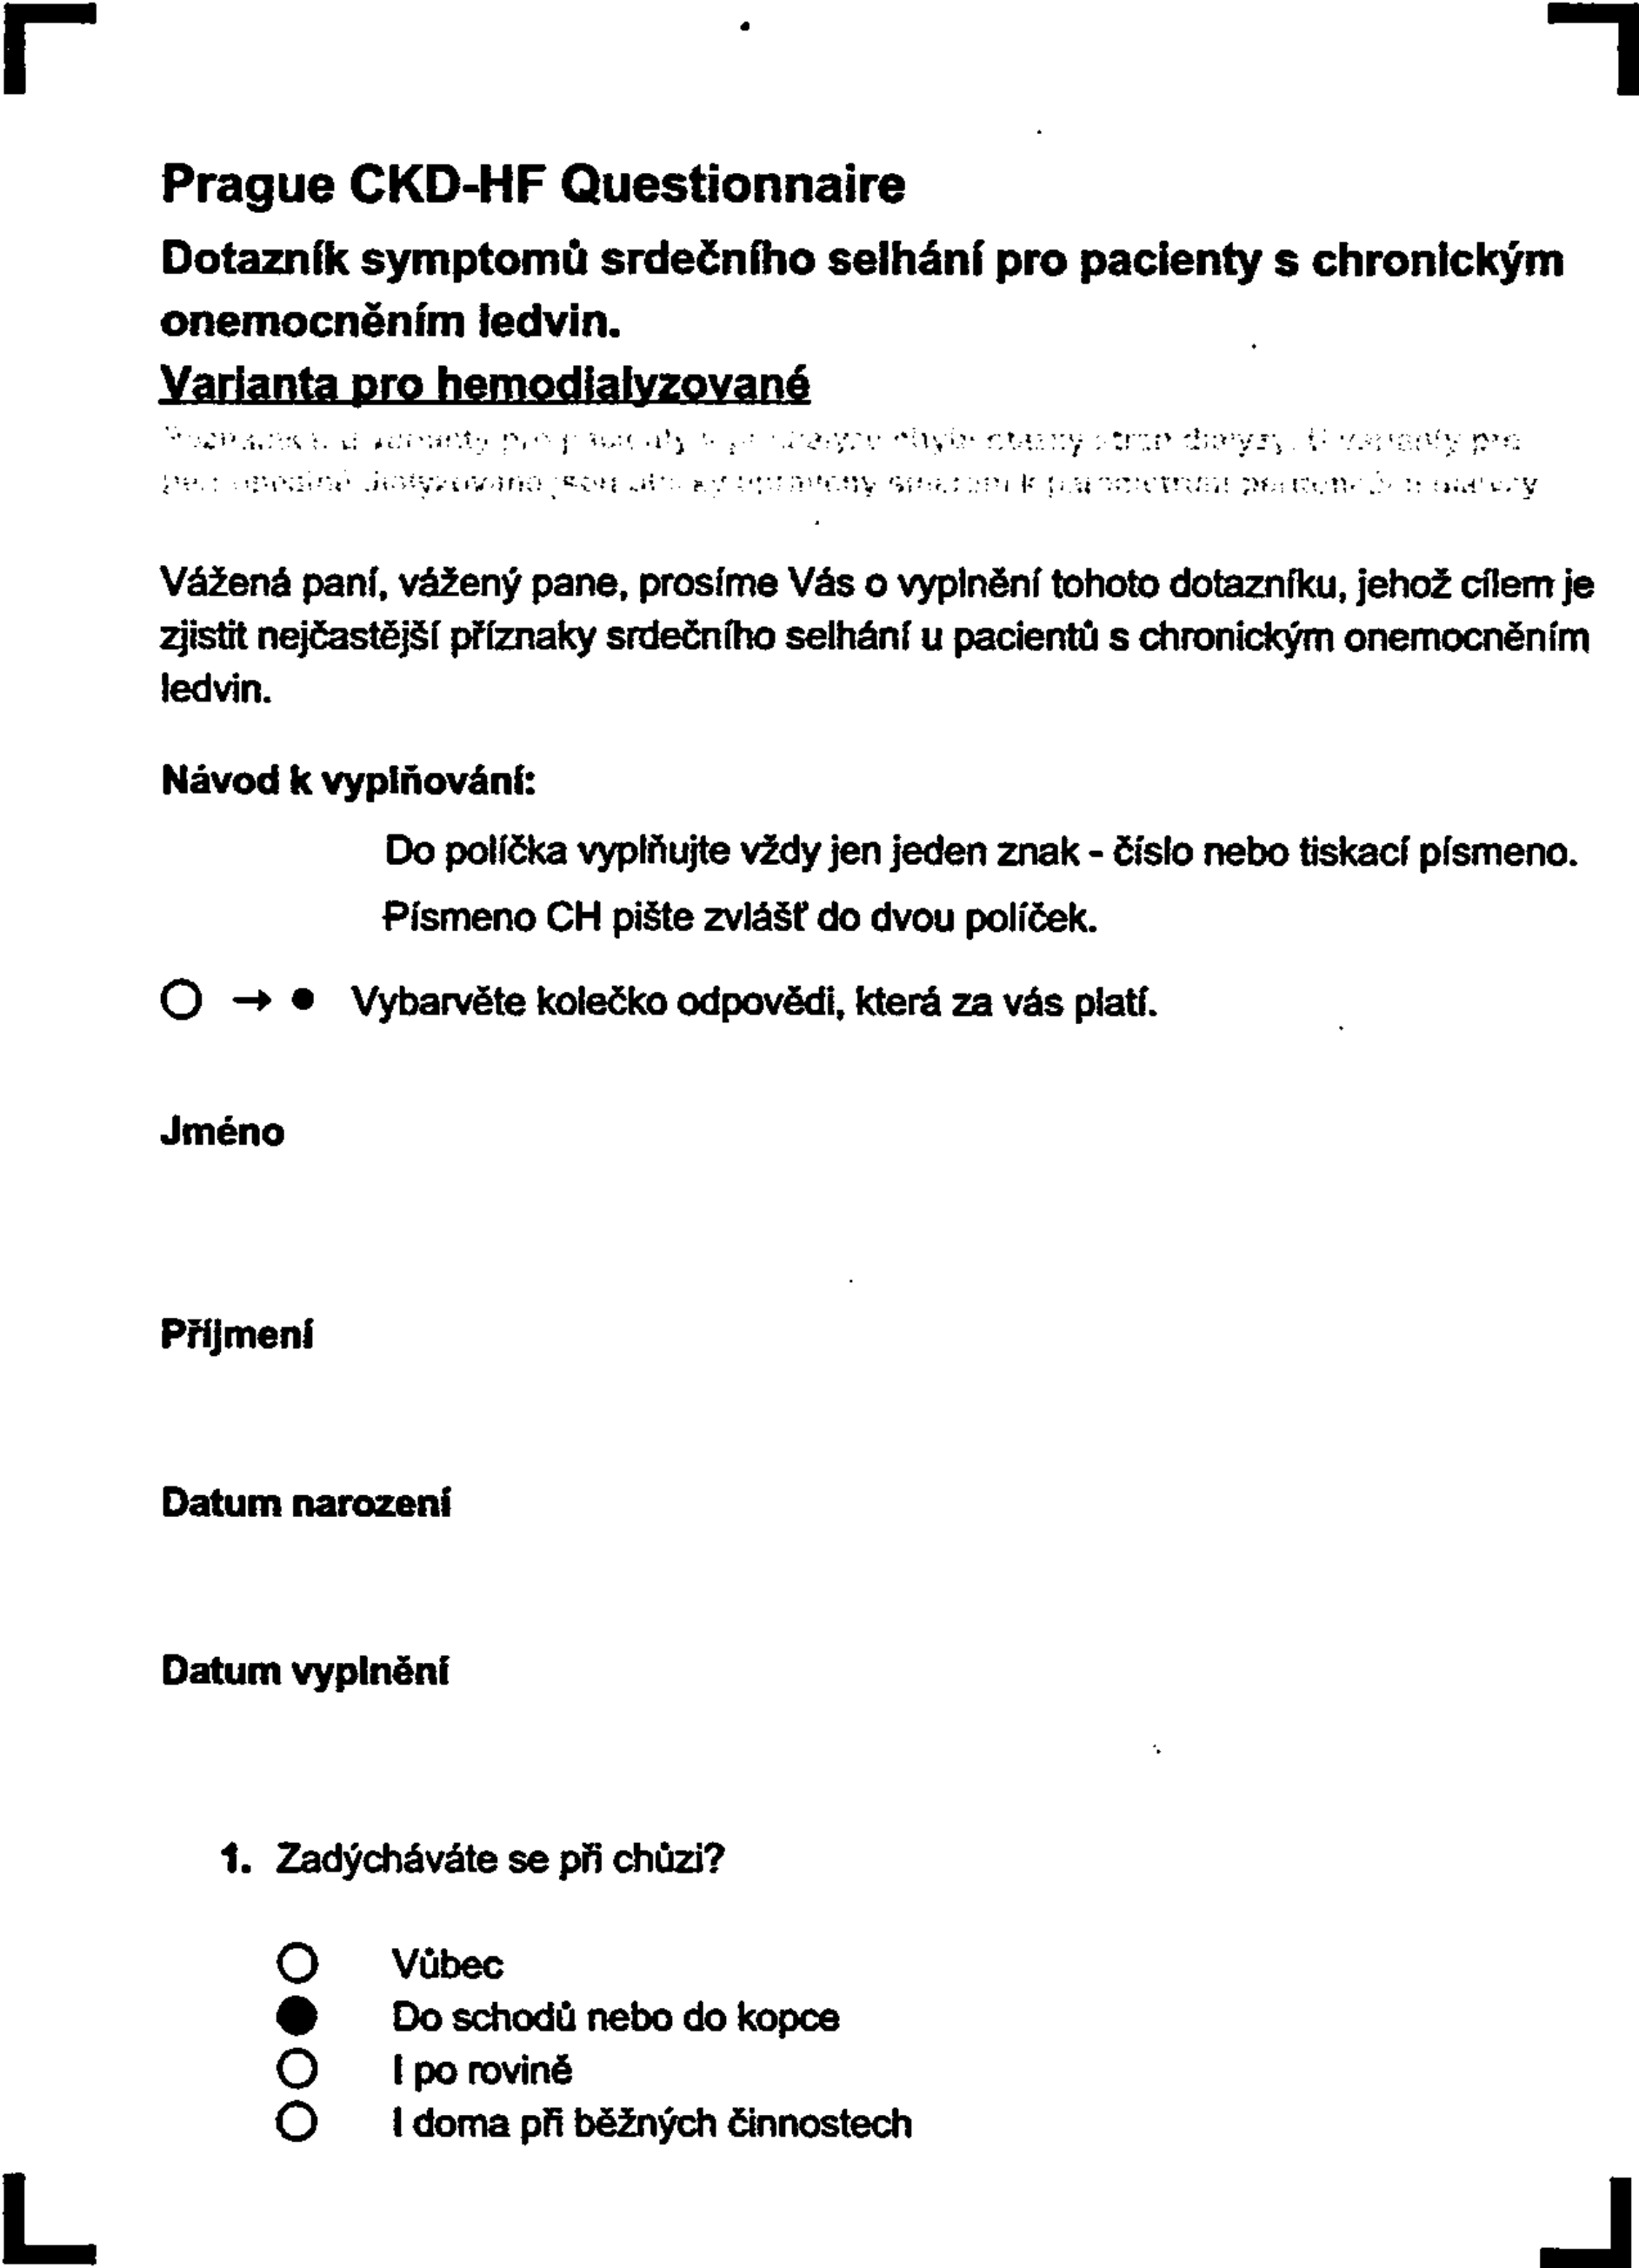

In [31]:
from preprocessing.preprocess import preprocess
from IPython.display import Image
import PIL.Image

config = json.loads(json_config)
image_path = "test/example_forms/julinka_dotaznik/julinka_dotaznik_3.jpg"
img = preprocess(image_path, config)

display(Image(image_path))

display(PIL.Image.fromarray(img))


<IPython.core.display.Javascript object>


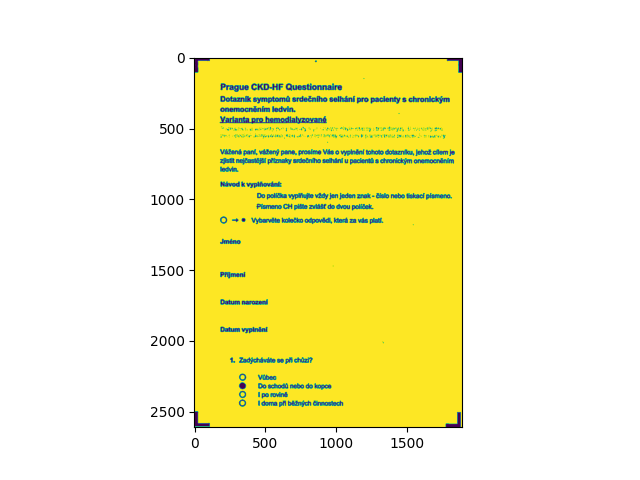

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

In [27]:
import json

class FormStructureParser:
    """
    Gets imdata in cv2 image
    """
    def __init__(self, form_structure_json):
        self.FormStructure = self.load_form_structure(form_structure_json)

    def load_form_structure(self, form_structure_json):
        return json.loads(form_structure_json)

    def process_form (self, form_img):
        form_data = self.FormStructure.copy()
        fields = []
        
        for field in self.FormStructure["fields"]:
            field_crops = self.process_field(field, form_img)
            fields.append(field_crops)
            
        form_data = self.FormStructure.copy()
        form_data["fields"] = fields
        return form_data

    def process_field(self, field_def, form):
        print(field_def["name"])
        boxCount = field_def["numberOfBoxes"]
        if field_def["orientation"] == "horizontal":
            x = field_def["topLeft"]["x"]
            width = field_def["boxWidth"]*boxCount + field_def['spaceBetweenBoxes']*(boxCount-1)
            y = field_def["topLeft"]["y"]
            height = field_def["boxHeight"]
    #         print(f"x: {x}")
    #         print(f"width: {width}")
    #         print(f"y: {y}")
    #         print(f"height: {height}")
            field_def["img"] = form[y:y+height, x:x+width]
            display(PIL.Image.fromarray(field_def["img"]))
            box_data = self.processHorizontalBoxes(field_def)
            
        elif field_def["orientation"] == "vertical":
            x = field_def["topLeft"]["x"]
            width = field_def["boxWidth"]
            y = field_def["topLeft"]["y"]
            height = field_def["boxHeight"]*boxCount + field_def['spaceBetweenBoxes']*(boxCount-1)
    #         print(f"x: {x}")
    #         print(f"width: {width}")
    #         print(f"y: {y}")
    #         print(f"height: {height}")
            field_def["img"] = form[y:y+height, x:x+width]
            display(PIL.Image.fromarray(field_def["img"]))
            box_data = self.processVerticalBoxes(field_def)
        else:
            m = "Attribute 'orientation' in form structure format have to be 'vertical' or 'horizontal'"
            raise InputError(m)
        
        
        field_def["box_data"] = box_data
        return field_def
    
    def processHorizontalBoxes(self, field_def):
        x = 0
        box_data = []
        field_img = field_def["img"]
        
        for i in range(field_def["numberOfBoxes"]):
            w = field_def["boxWidth"]
            step = w + field_def["spaceBetweenBoxes"]
            box_img = field_img[:,x:x+w]
            box_data.append(box_img)
            display(PIL.Image.fromarray(box_img))
            x = x + step
        
        return box_data
    
    def processVerticalBoxes(self, field_def):
        y = 0
        box_data = []
        field_img = field_def["img"]
        
        for i in range(field_def["numberOfBoxes"]):
            h = field_def["boxHeight"]
            step = h + field_def["spaceBetweenBoxes"]
            box_img = field_img[y:y+h,:]
            box_data.append(box_img)
            display(PIL.Image.fromarray(box_img))
            y = y + step
        
        return box_data
            



In [13]:
j_text = """
{
  "fields": [
    {
      "name": "Example",
      "type": "string",
      "topLeft": {
        "x": 137,
        "y": 95
      },
      "numberOfBoxes": 5,
      "boxWidth": 37,
      "boxHeight": 32,
      "spaceBetweenBoxes": 32,
      "orientation": "horizontal"
    },
    {
      "name": "Example2",
      "type": "string",
      "topLeft": {
        "x": 137,
        "y": 135
      },
      "numberOfBoxes": 5,
      "boxWidth": 37,
      "boxHeight": 32,
      "spaceBetweenBoxes": 32,
      "orientation": "horizontal"
    },
    {
      "name": "Example3",
      "type": "string",
      "topLeft": {
        "x": 137,
        "y": 174
      },
      "numberOfBoxes": 6,
      "boxWidth": 37,
      "boxHeight": 30,
      "spaceBetweenBoxes": 9,
      "orientation": "vertical"
    }
  ],
  "size": {
    "width": 740,
    "height": 1049
  }
}

"""

#     {
#       "name": "Example-shit",
#       "type": "boxes",
#       "topLeft": {
#         "x": 10,
#         "y": 0
#       },
#       "numberOfBoxes": 6,
#       "boxWidth": 20,
#       "boxHeight": 100,
#       "spaceBetweenBoxes": 1,
#       "orientation": "vertical"
#     }

1


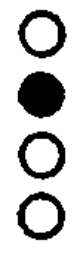

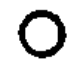

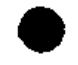

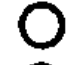

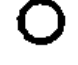

In [50]:
fsp = FormStructureParser(json_config)
# field_img = fsp.process_field(fsp.FormStructure['fields'][0],img)
form_data = fsp.process_form(img)

In [139]:
form_data

{'fields': [{'name': 'Example',
   'type': 'string',
   'topLeft': {'x': 137, 'y': 95},
   'numberOfBoxes': 5,
   'boxWidth': 37,
   'boxHeight': 32,
   'spaceBetweenBoxes': 32,
   'orientation': 'horizontal',
   'img': array([[255, 255, 255, ..., 255, 255, 255],
          [255, 255, 255, ..., 255, 255, 255],
          [255, 255, 255, ..., 255, 255, 255],
          ...,
          [255, 255, 255, ..., 255, 255, 255],
          [255, 255, 255, ..., 255, 255, 255],
          [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
   'box_data': [array([[255, 255, 255, ..., 255, 255, 255],
           [255, 255, 255, ..., 255, 255, 255],
           [255, 255, 255, ..., 255, 255, 255],
           ...,
           [255, 255, 255, ..., 255, 255, 255],
           [255, 255, 255, ..., 255, 255, 255],
           [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
    array([[255, 255, 255, ..., 255, 255, 255],
           [255, 255, 255, ..., 255, 255, 255],
           [255, 255, 255, ..., 255, 255, 25